In [113]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

#####TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

def bb_predict(X):
    return clas.predict(X)

def bb_predict_proba(X):
    return clas.predict_proba(X)

In [114]:
df=pd.read_csv('df_RFE_6Class_LOF.csv')
df2=df.drop(columns=['Unnamed: 0','label'])

test = pd.read_csv('df_RFE_test.csv')
test2=test.drop(columns=['Unnamed: 0','label'])

In [115]:
X = df2.values
y = np.array(df['label'])

Xtest= test2.values
ytest = np.array(test['label'])

# Explainability RF

In [116]:
######CON IL TUNING - LOF
clas = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, min_samples_split=30, 
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)

In [117]:
######CON IL TUNING - LOF
clas.fit(X, y)
y_pred444 = clas.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred444))
print('F1-score %s' % f1_score(ytest, y_pred444, average=None))
print(classification_report(ytest, y_pred444))

Accuracy 0.8859857482185273
F1-score [0.89980732 0.87965921 0.90362954 0.80250784 0.82612695 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       496
           2       0.88      0.88      0.88       471
           3       0.95      0.86      0.90       420
           4       0.82      0.78      0.80       491
           5       0.81      0.84      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.88      0.89      2947
weighted avg       0.89      0.89      0.89      2947



In [118]:
scores = {
        'Train': accuracy_score(y, clas.predict(X)),
        'Test': accuracy_score(ytest, clas.predict(Xtest)),
    }
print(scores)

{'Train': 0.9612050589739946, 'Test': 0.8859857482185273}


In [119]:
clas.feature_importances_

array([0.00821975, 0.02213419, 0.00599913, 0.06359385, 0.07301212,
       0.02491914, 0.0910052 , 0.07972798, 0.03630747, 0.02917696,
       0.0177891 , 0.0331851 , 0.02714744, 0.01447979, 0.00847789,
       0.00167294, 0.00577837, 0.02889916, 0.02141818, 0.05366376,
       0.01020771, 0.04604724, 0.05544452, 0.00960291, 0.00946697,
       0.06485785, 0.07864728, 0.0163659 , 0.06275211])

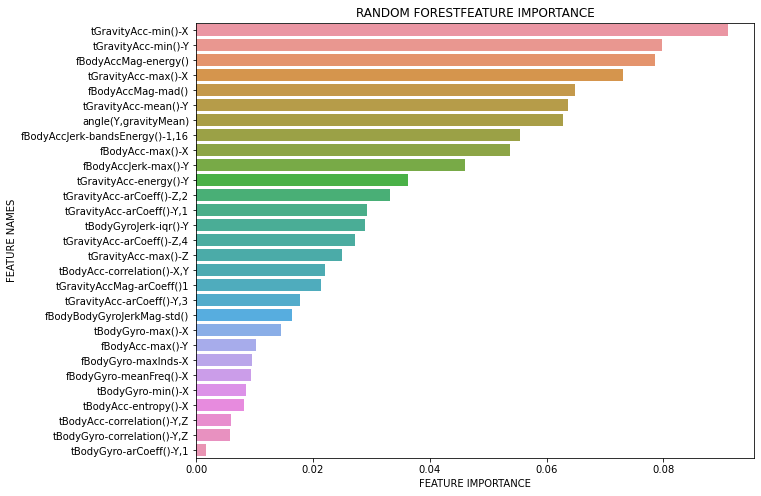

In [120]:
plot_feature_importance(clas.feature_importances_,df2.columns,'RANDOM FOREST')

In [121]:
import shap 
explainer = shap.TreeExplainer(clas)

In [49]:
esempio1 = test.loc[[79]].drop(columns=["Unnamed: 0"])
esempio1

esempio2 = test.loc[[55]].drop(columns=["Unnamed: 0"])
esempio2

# test[test.label == 2]

tBodyAcc-entropy()-X  tBodyAcc-correlation()-X,Y  \
55             -0.315573                   -0.068183   

    tBodyAcc-correlation()-Y,Z  tGravityAcc-mean()-Y  tGravityAcc-max()-X  \
55                   -0.443565              0.721414            -0.650349   

    tGravityAcc-max()-Z  tGravityAcc-min()-X  tGravityAcc-min()-Y  \
55             0.667244            -0.677476             0.733495   

    tGravityAcc-energy()-Y  tGravityAcc-arCoeff()-Y,1  ...  fBodyAcc-max()-Y  \
55                0.054945                  -0.426973  ...         -0.967086   

    fBodyAccJerk-max()-Y  fBodyAccJerk-bandsEnergy()-1,16  \
55             -0.957727                        -0.998502   

    fBodyGyro-maxInds-X  fBodyGyro-meanFreq()-X  fBodyAccMag-mad()  \
55                 -1.0               -0.157349          -0.849105   

    fBodyAccMag-energy()  fBodyBodyGyroJerkMag-std()  angle(Y,gravityMean)  \
55             -0.986273                   -0.896511             -0.484928   

    label  
55      6  

[1 rows x 30 columns]

In [50]:
shap_values = explainer.shap_values(esempio1)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], esempio1)

In [51]:
shap_values = explainer.shap_values(esempio2)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], esempio2)

#  

In [122]:
import lime
import lime.lime_tabular

In [123]:
predict_fn_rf = lambda x: clas.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = df2.columns,kernel_width=6)

In [124]:
choosen_instance = test.loc[[79]].drop(columns=["Unnamed: 0","label"]).values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features = 7)
exp.show_in_notebook(show_table= True, show_all=False)

In [125]:
choosen_instance = test.loc[[55]].drop(columns=["Unnamed: 0","label"]).values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf, num_features=7)
exp.show_in_notebook(show_table= True, show_all=False)

In [92]:
import xgboost
import shap

# train XGBoost model
model = xgboost.XGBClassifier(max_depth=1, learning_rate=0.5).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.Independent(X)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit, feature_names = list(df2.columns))
shap_values = explainer(X[:100])

# visualize the first prediction's explanation


Permutation explainer: 101it [00:55,  1.46it/s]                                                                        


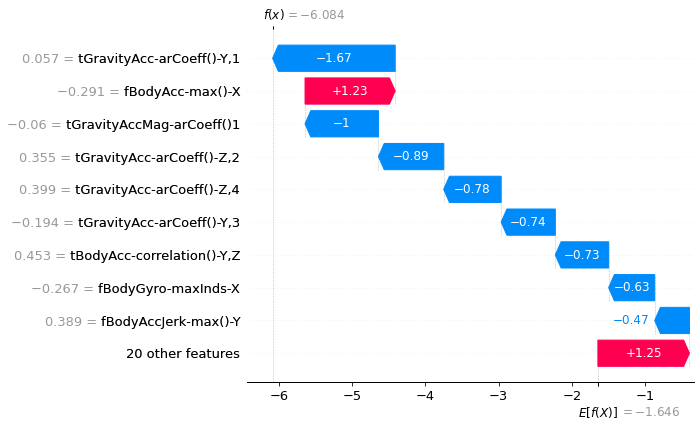

In [96]:
shap.plots.waterfall(shap_values[79])

In [97]:
shap.plots.force(shap_values[79])

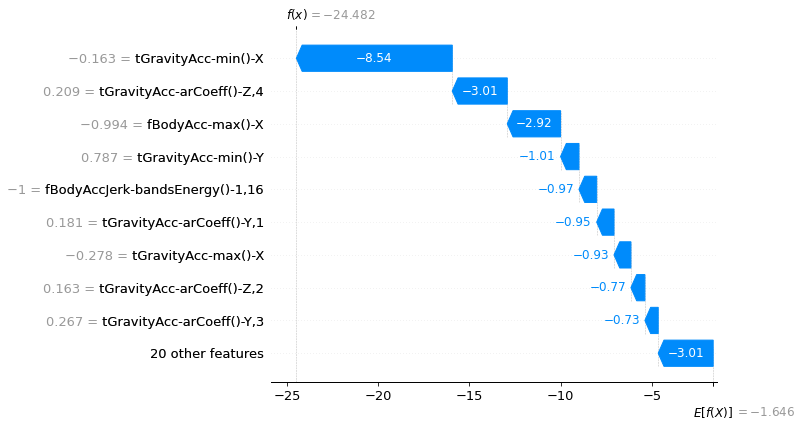

In [98]:
shap.plots.waterfall(shap_values[55])

In [99]:
shap.plots.force(shap_values[55])

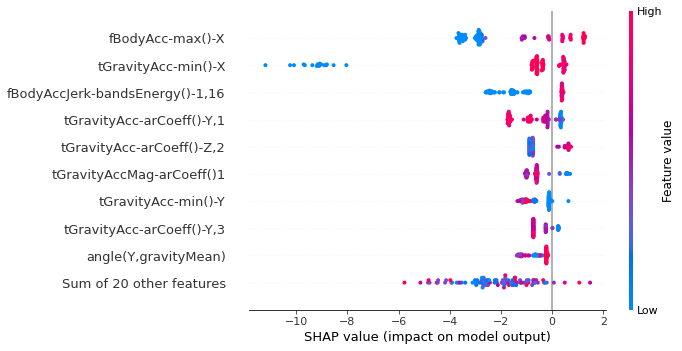

In [94]:
shap.plots.beeswarm(shap_values, max_display=10)

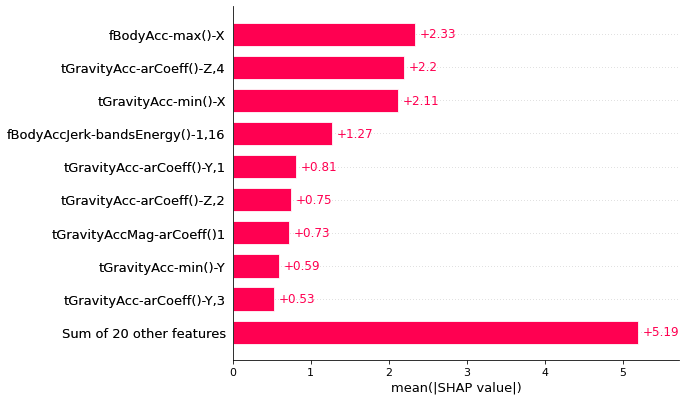

In [95]:
shap.plots.bar(shap_values)

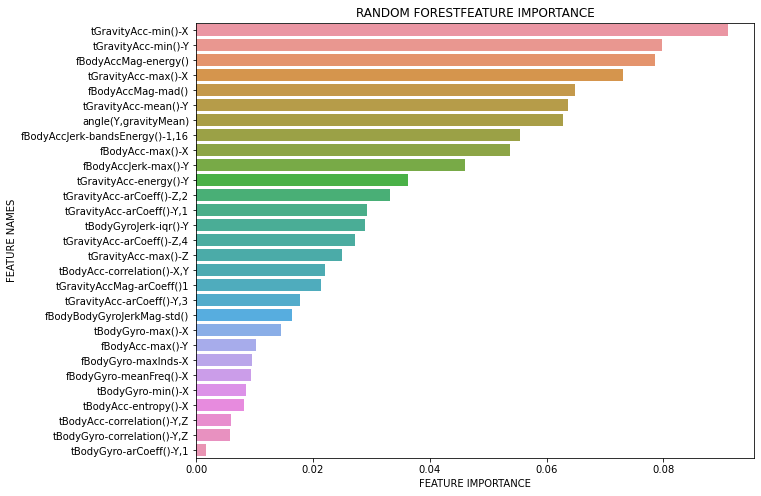

In [44]:
plot_feature_importance(clas.feature_importances_,df2.columns,'RANDOM FOREST')